# Homework 3: EDA of Bike Sharing

## Introduction

This homework has four goals: 

* to learn how to read plain text delimited data into pandas
* to gain experience preparing data for analysis
* to use EDA to learn about your data 
* to learn how to make informative plots

This assignment includes both specific tasks to perform and open-ended questions to investigate. The open-ended questions ask you to think creatively and critically in how you plot the data and summarize information gleaned from these visualizations.

There are 4 parts to this assignment: 
- data preparation
- exploring the distribution of riders
- exploring the relationship between time and rider counts
- and exploring the relationship between weather and rider counts. 

The data preparation section gives you specific tasks to perform. Then in each of the next three sections, you are asked to create 2 plots. The first plot is described in some detail and the second plot is one of your choosing.

Be sure to choose a plot that provides additional information about the distributions and relationships in the data. Remember that we are interested in how ride sharing works.  Therefore, plots that, for example examine the weather in DC *without reference to ride sharing are not interesting*.

**Be sure that your plots have informative titles, axis labels, and legends.**

In [304]:
# Run this cell to set up your notebook

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')


Assignment: Homework 3
OK, version v1.12.10



In [305]:
ok.auth(force=False) # Change False to True if you are getting errors authenticating

Successfully logged in as kath.eddinger@berkeley.edu


## Loading Bike Sharing Data
The data we are exploring is data on bike sharing in Washington D.C and can be found in `data/bikeshare.txt`.

The variables in this data frame are defined as:
```
instant: record index
dteday : date
season : season (1:spring, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : whether day is holiday or not
weekday : day of the week
workingday : if day is neither weekend nor holiday
weathersit :
    1: Clear or partly cloudy
    2: Mist + clouds
    3: Light Snow or Rain
    4: Heavy Rain or Snow
temp : Normalized temperature in Celsius (divided by 41)
atemp: Normalized feeling temperature in Celsius (divided by 50)
hum: Normalized percent humidity (divided by 100)
windspeed: Normalized wind speed (divided by 67)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including casual and registered
```

In the following we load the raw data into the dataframe `bike`. 

In [306]:
bike = pd.read_csv("data/bikeshare.txt")
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Preparation
Many of the variables that are numeric/integer should be factors. These include holiday, weekday, workingday, and weathersit. In the following question we convert these 4 variables to factors and use appropriate labels for the levels. In particular use the 3 letter label, e.g., Sun, Mon, … for weekday. You may simply use yes/no for holiday and workingday. 

In this exercise we will **overwrite the corresponding variables in the data frame.** However be sure to write a comment in your code about the transformation and leave the underlying datafile `data/bikeshare.txt` unmodified.

### Question 1

#### Question 1a (Decoding `holiday`)
Figure out whether a 0 means yes or no for the holiday column of each row (there are fewer holidays than other days). Translate the numeric entry into a `'yes'` or `'no'` and set `num_holidays` equal to the number of entries in the table corresponding to a holiday. 

In [307]:
# Hint: df.replace( ..., inplace=True)

bike['holiday'].replace([0, 1],['no', 'yes'],inplace=True)

num_holidays = bike['holiday'].where(bike['holiday']=='yes').count()

In [308]:
_ = ok.grade('q01a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/M8q881
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1b (Decoding `weekday`, `workingday`, and `weathersit`)


Finish decoding the `weekday`, `workingday`, and `weathersit` fields:

1. **`'weekday'`:** It turns out that Monday is the day with the most holidays.  Use that information to change the `'weekday'` column to use the 3 letter label (`'Sun'`, `'Mon'`, ...) instead of its current numerical values.
1. **`'workingday'`:** Convert to `'yes'` and `'no'`.
1. **`'weathersit'`:** You should replace each value with one of `'Clear'`, `'Mist'`, `'Light'`, or `'Heavy'`.

In [309]:
bike['weekday'].replace([0, 1, 2, 3, 4, 5, 6],['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],inplace=True)
bike['workingday'].replace([0, 1],['no', 'yes'],inplace=True)
bike['weathersit'].replace([1, 2, 3, 4],['Clear', 'Mist', 'Light', 'Heavy'],inplace=True)

In [310]:
_ = ok.grade('q01b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/Nkrkk8
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the number of daily registered and unregistered users.

Construct a table (dataframe) consisting of:
* `'casual'`: total casual riders for each day
* `'registered'`: total registered riders for each day
* `'workingday'`: whether that day is a working day or not (yes or no)

You will want to use the `groupby` and `aggregate` functions as well as the `sum` and `last` aggregation operators. 

In [311]:

cas = bike.groupby(['dteday']).agg('sum')['casual']
reg = bike.groupby(['dteday']).agg('sum')['registered']
wor = bike.groupby(['dteday'])['workingday'].last()


daily_counts = pd.DataFrame(
    {'casual': cas,
     'registered': reg,
     'workingday': wor
    }
)


In [312]:
_ = ok.grade('q01c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/OYvYYE
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use the `sns.distplot` function to create a plot that overlays the distribution of the daily counts of casual and registered users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

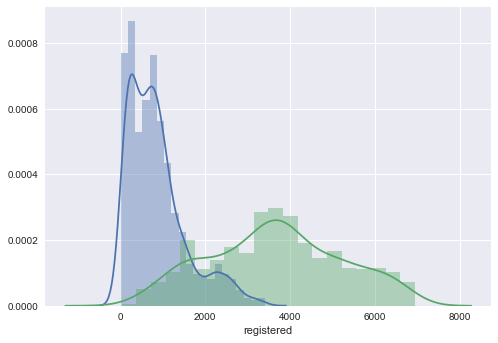

In [313]:
sns.distplot(daily_counts['casual'], bins=20)
sns.distplot(daily_counts['registered'], bins=20)

#### Question 2b

Describe the differences you notice between the density curves for casual and registered riders. Be sure to consider features such as modes, symmetry and skewness, tails, gaps and unusual values. Also comment on the spread of the distributions.

In [314]:
q2b_answer = r"""

'casual' has a much shaper peak and is shifted left from 'registered'.'casual' is skew right and 
has a right tail. There is a bit of a gap between some of its tallest bins.

'registered' is a very spread, and is fairly symmetric. There is one bin
for one of the lower numbers of riders that appears to be a mode.

These things indicate that the number of causal riders per day tends to be fairly consistent, 
and is generally a smaller than the number of registered riders.



"""

display(Markdown(q2b_answer))



'casual' has a much shaper peak and is shifted left from 'registered'.'casual' is skew right and 
has a right tail. There is a bit of a gap between some of its tallest bins.

'registered' is a very spread, and is fairly symmetric. There is one bin
for one of the lower numbers of riders that appears to be a mode.

These things indicate that the number of causal riders per day tends to be fairly consistent, 
and is generally a smaller than the number of registered riders.





### Question 2c

The density plots do not show us how the daily counts for registered and casual riders vary together. Use `sns.lmplot` to make a scatter plot to investigate the relationship between casual and registered counts. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small  to help with over plotting.

(0, 8000)

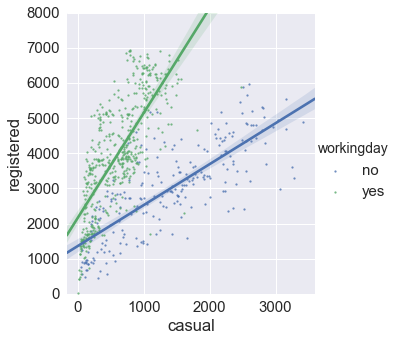

In [315]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)

sns.lmplot('casual',
           'registered',
           hue = 'workingday', data=daily_counts, scatter_kws={"marker": "D", "s": 5})

plt.ylim([0,8000])

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend?
Why might we be concerned with overplotting in examining this relationship? 


In [316]:
q2d_answer = r"""

It looks like there is a linear relationship between registered and casual riders but 
the slope changes depending on whether or not it is a workday.

One reason to be concerned is that it's also hard to see density because of the overplotting.

"""

display(Markdown(q2d_answer))



It appears that on workdays the ratio of registered riders to casual riders is higher than on weekends.

One reason to be concerned is that closer to the axis it is harder to see the relationship between
working day and type of riders. It's also hard to see density.



## Question 3

### Question 3a Bivariate Kernel Density Plot
 
The scatter plot you made in question 2c makes clear the separation between the work days and weekend days.  However, the overplotting
makes it difficult to see the density of the joint counts. To address this
issue, let's try visualizing the data with another technique, the kernel density plot.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks like this:

<img src='bivariate_kde_of_daily_rider_types.png' >

Making this plot can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

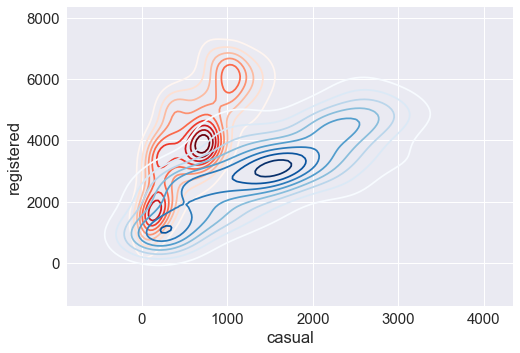

In [317]:
# Set 'ind' to a boolean condition that will allow you to filter daily_counts for rows corresponding to workingdays
ind = daily_counts['workingday']=='yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
# Hint: use loc and ind to splice out the relevant rows and column (casual/registered)

casual_weekday = daily_counts['casual'].loc[ind]
registered_weekday = daily_counts['registered'].loc[ind]

# User sns.kdeplot to plot the bivariate KDE for weekday rides

# Repeat the same steps above but for rows corresponding to non-workingdays
casual_weekend = daily_counts['casual'].loc[ind==False]
registered_weekend = daily_counts['registered'].loc[ind==False]

sns.kdeplot(casual_weekday, registered_weekday,  cmap="Reds")
sns.kdeplot(casual_weekend, registered_weekend, cmap="Blues")

#### Question 3b

What does the contour plot reveal about the relationship between casual and registered riders for both weekdays and weekends? How is it an improvement over the scatter plot you created in Q2c?

In [318]:
q3b_answer = r"""

This contour plot fixes overplotting by showing the density. Without density, you can't tell whether 
or not two points are plotted on top of one another and its hard to see the data. 
"""

display(Markdown(q3b_answer))

#### Question 3c

As an alternative approach, construct the following set of three plots where the main plot shows the contours of daily counts for registered and casual riders and the two "margin" plots provide the univariate distribution of each of these variables. 

<img src="joint_distribution_of_daily_rider_types.png"/>

You might find `sns.jointplot` helpful. You will want to explore the `kind` parameter in `jointplot` to achieve the plot above. Also, consider using `set_axis_labels` to rename your axes.

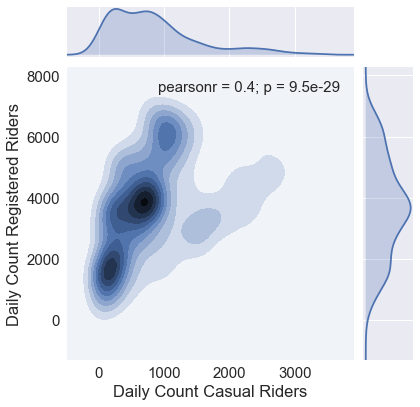

In [319]:
g = (sns.jointplot(x="casual", y="registered", 
              data=daily_counts, kind="kde")
    )

g.set_axis_labels("Daily Count Casual Riders", "Daily Count Registered Riders")

## Exploring Ride Sharing and Time

### Question 4a

Plot number of riders for each hour of each day in the month of June in 2011. 

Make sure to add descriptive x-axis and y-axis labels and create a legend to distinguish the line for casual riders and the line for registered riders. The end result should look like this:

<img src="june_riders.png" width='800px'/>

(0, 29)

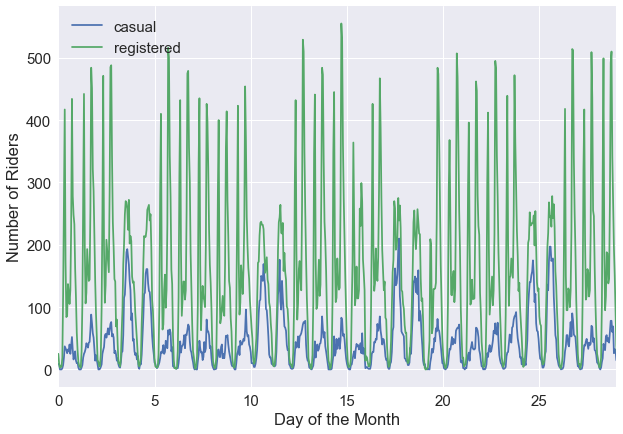

In [400]:
# This makes the plot bigger
plt.figure(figsize=(10, 7))

june = bike.groupby(['dteday', 'hr']).sum().loc['2011-06-01':'2011-06-30']

day_of_month = [i/24 for i in june['instant']- june['instant'][0]]
day_of_month

plt.plot(day_of_month, june['casual'])
plt.plot(day_of_month,june['registered'])
plt.xlabel('Day of the Month')
plt.ylabel('Number of Riders')
plt.legend()
# plt.locator_params(axis='x', nticks=1)
plt.xlim([0,29])
# plt.show()


#### Question 4b

This plot has several interesting features. How do the number of casual and registered riders compare for different days of the month? What is an interesting trend and pattern you notice between the lines?

In [675]:
q4b_answer = r"""

The number of registered riders is consistently higher on weekdays and lower on weekends, while the number of
casual riders is consistently lower on weekdays, and higher on weekends.

The number of registered riders is still higher than casual on weekends, but they are much closer.

Also you can tell than for both registered and casual riders, certain times of the day have much more riders than others.


"""

display(Markdown(q4b_answer))



The number of registered riders is consistently higher on weekdays and lower on weekends, while the number of
casual riders is consistently lower on weekdays, and higher on weekends.

The number of registered riders is still higher than casual on weekends, but they are much closer.

Also you can tell than for both registered and casual riders, certain times of the day have much more riders than others.




## Question 5 (Understanding Daily Patterns)

Let's examine the behavior or riders by plotting the average number of riders for each hour of the day over the entire dataset stratified by rider type.  

Your plot should look like the following:

<img src="diurnal_bikes.png" width="800px"/>

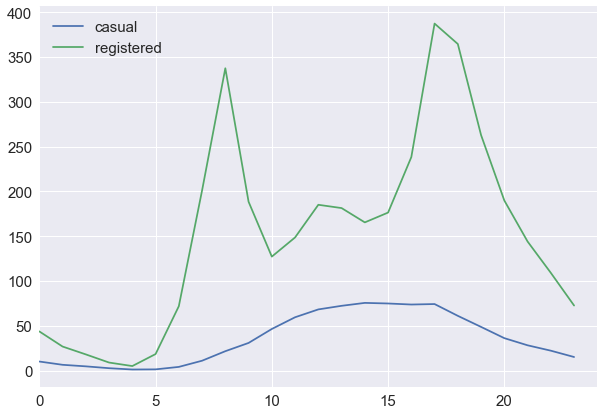

In [661]:
# This makes the plot bigger
plt.figure(figsize=(10, 7))

hourly = bike.groupby(['hr'])[['casual','registered']].mean()

hours = bike['hr'].unique()

plt.plot(hours, hourly['casual'])
plt.plot(hours, hourly['registered'])

plt.xlim([0,24])
plt.legend(loc=2)

#### Question 5b

What can you observe from the plot, what does those peaks mean?

In [674]:
q5b_answer = r"""

The average number of registered riders peaks around 8am, and around 5-6pm each day, with a small dip in the middle around noon.
This means that most registered users are using the bikes to go to work in the morning, 
and come home when work is over, with some people using their bikes to get lunch.

The average number of casual riders doesn't have any sharp peaks, and begins to slowly swell from 6am-noon, 
levels off for a little while, and then slowly decreases again after 5 or 6pm. This means that most causal riders 
are riding their bikes during the late morning to early evening. As a group, the casual riders aren't getting 
up as early as the registered riders to ride their bikes.

"""

display(Markdown(q5b_answer))



The average number of registered riders peaks around 8am, and around 5-6pm each day, with a small dip in the middle around noon.
This means that most registered users are using the bikes to go to work in the morning, 
and come home when work is over, with some people using their bikes to get lunch.

The average number of casual riders doesn't have any sharp peaks, and begins to slowly swell from 6am-noon, 
levels off for a little while, and then slowly decreases again after 5 or 6pm. This means that most causal riders 
are riding their bikes during the late morning to early evening. As a group, the casual riders aren't getting 
up as early as the registered riders to ride their bikes.



## Exploring Ride Sharing and Weather
### Question 6
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

#### Question 6a
Create a new column `propCasual` in the `bike` dataframe representing the proportion of casual riders comparing to the total number of riders.



In [430]:
total_riders = bike['casual'][:] + bike['registered'][:]

bike['propCasual'] = bike['casual'][:]/ total_riders[:]

In [431]:
_ = ok.grade('q06a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/gJqLKG
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 6b
In order to examine the relationship between proportion of casual riders and temerature, we can make some bivariate scatterplot using `sns.swarmplot` or `sns.lmplot`. We can even use color/hue to encode the information about day of week. Run the following cells to create such plots. (Plot contains lots of points, so it may a while for it to render)


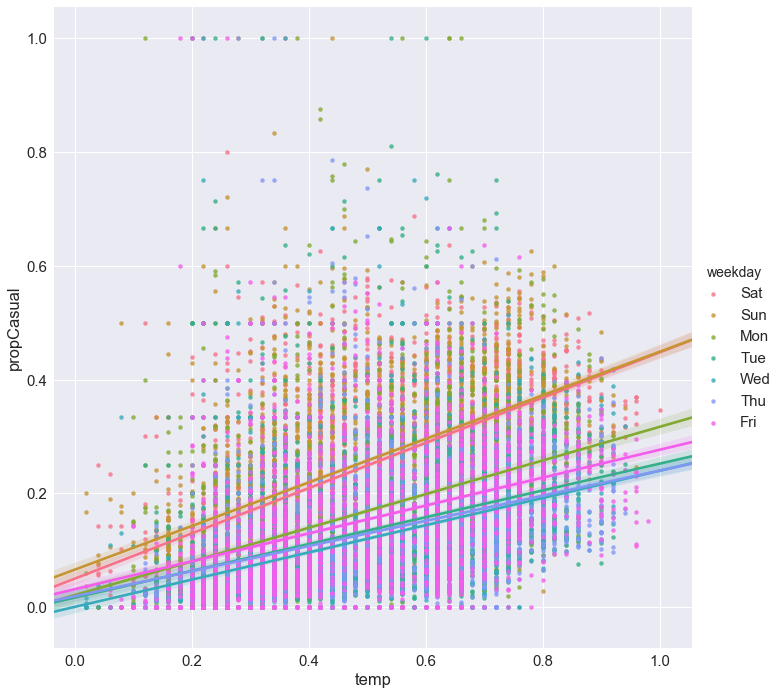

In [432]:
sns.lmplot(data=bike,x="temp",y="propCasual",hue="weekday",scatter_kws={"s": 20},size=10)

As you can see from the scatterplot, many points are overlapping. Though the plot can show some trends, it would be hard to verify your findings. Therefore we could fit some curves to summarize the data and plot the curves instead.

Basically you will need to make a plot like this: Fit and plot curves using data from different weekdays. 

<img src="curveplot_temp_propCasual.png" width=500px>

You will need to use the function [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) to fit a curve from two sequences `x` and `y`. You may find the example below helpful.



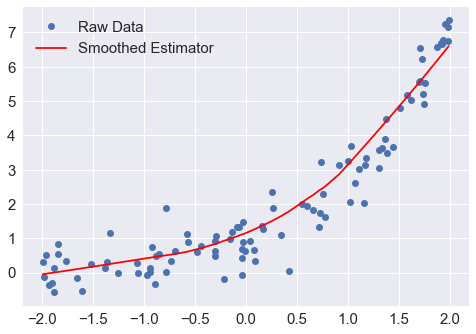

In [433]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 -2)
yobs = np.exp(xobs) + np.random.randn(100)/2.0
plt.plot(xobs, yobs, 'o', label = "Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
plt.plot(xobs, ysmooth, 'r-', label ="Smoothed Estimator")
plt.legend()

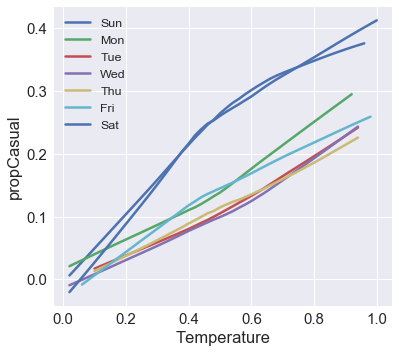

In [670]:
#Make some plots here...

# su = sns.lmplot(x="temp", y="propCasual", data=sun_propTemp, lowess=True, scatter=False)
# m = sns.lmplot(x="temp", y="propCasual", data=mon_propTemp, lowess=True, scatter=False)
# tu = sns.lmplot(x="temp", y="propCasual", data=tue_propTemp, lowess=True, scatter=False)
# w = sns.lmplot(x="temp", y="propCasual", data=wed_propTemp, lowess=True, scatter=False)
# th = sns.lmplot(x="temp", y="propCasual", data=thu_propTemp, lowess=True, scatter=False)
# f = sns.lmplot(x="temp", y="propCasual", data=fri_propTemp, lowess=True, scatter=False)
# sa =sns.lmplot(x="temp", y="propCasual", data=sat_propTemp, lowess=True, scatter=False)

sun_propTemp = day_propTemp.where(bike['weekday']== 'Sun')
sun_smooth = lowess(sun_propTemp['propCasual'], sun_propTemp['temp'])
plt.plot(sun_smooth[:,0],sun_smooth[:,1], label='Sun', linewidth=2.5)

mon_propTemp = day_propTemp.where(bike['weekday']== 'Mon')
mon_smooth = lowess(mon_propTemp['propCasual'], mon_propTemp['temp'])
plt.plot(mon_smooth[:,0], mon_smooth[:,1], label='Mon', linewidth=2.5)

tue_propTemp = day_propTemp.where(bike['weekday']== 'Tue')
tue_smooth = lowess(tue_propTemp['propCasual'], tue_propTemp['temp'])
plt.plot(tue_smooth[:,0], tue_smooth[:,1], label='Tue', linewidth=2.5)

wed_propTemp = day_propTemp.where(bike['weekday']== 'Wed')
wed_smooth = lowess(wed_propTemp['propCasual'], wed_propTemp['temp'])
plt.plot(wed_smooth[:,0], wed_smooth[:,1], label='Wed', linewidth=2.5)

thu_propTemp = day_propTemp.where(bike['weekday']== 'Thu')
thu_smooth = lowess(thu_propTemp['propCasual'], thu_propTemp['temp'])
plt.plot(thu_smooth[:,0], thu_smooth[:,1], label='Thu', linewidth=2.5)

fri_propTemp = day_propTemp.where(bike['weekday']== 'Fri')
fri_smooth = lowess(fri_propTemp['propCasual'], fri_propTemp['temp'])
plt.plot(fri_smooth[:,0], fri_smooth[:,1], label='Fri', linewidth=2.5)

sat_propTemp = day_propTemp.where(bike['weekday']== 'Sat')
sat_smooth = lowess(sat_propTemp['propCasual'], sat_propTemp['temp'])
plt.plot(sat_smooth[:,0], sat_smooth[:,1], label='Sat', linewidth=2.5)

# plt.ylim([-0.04,0.44])
# plt.xlim([-0.04,1.04])
# plt.axis('equal')

plt.axes().set_aspect(2)
plt.xlabel('Temperature')
plt.ylabel('propCasual')
plt.legend(fontsize='x-small')

#### Question 6c
What can you discover from the curve plot? How is the propCasual changing?

In [672]:
q6c_answer = r"""

propCasual tends to stay fairly consistent in all weather for weekdays.
propCasual is higher overall on weekends, but starts to descrease as the weather gets very hot.
There are also more casual riders on days that are next to weekends (mondays and fridays).

"""

display(Markdown(q6c_answer))



propCasual tends to stay fairly consistent in all weather for weekdays.
propCasual is higher overall on weekends, but starts to descrease as the weather gets very hot.
There are also more casual riders on days that are next to weekends (mondays and fridays).



In [673]:
list(bike['weekday'].iloc[::2000])

['Sat', 'Tue', 'Mon', 'Mon', 'Mon', 'Sun', 'Sun', 'Sat', 'Sun']

## Submission

Run the cell below to run all the OkPy tests at once:

In [676]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [677]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Submit... 100% complete
Submission successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/submissions/G6k8Y3
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit

